In [1]:
import pandas as pd # For reading and preprocessing data for use in scikit-learn.
import numpy as np # Allows you to work with multidimensional arrays and matrices. It’s perfect for scientific or mathematical calculations.
import seaborn as sns # Essential for Data visualization.
import matplotlib.pyplot as plt # Essential for Data visualization.
from sklearn.linear_model import LinearRegression # Involves solving a system of linear equations
%matplotlib inline

C:\Users\tailb\AppData\Local\Temp\ipykernel_24196\3823308697.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # For reading and preprocessing data for use in scikit-learn.


A linear model describes a linear relationship between an input and output variable. We therefore need to
make sure that the problem we are looking to model with Linear Regression indeed has a continuous
input and output variable with a linear relationship.

Below we have a scatter plot of the data points. We can observe that the more years of experience an
employee has, the higher their salary. This is a linear relationship that can be estimated with simple linear
relationship.

In [5]:
file_path = r"\Users\tailb\Downloads\Salary_Data.csv" # file_path is essential!
salary = pd.read_csv(file_path)
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


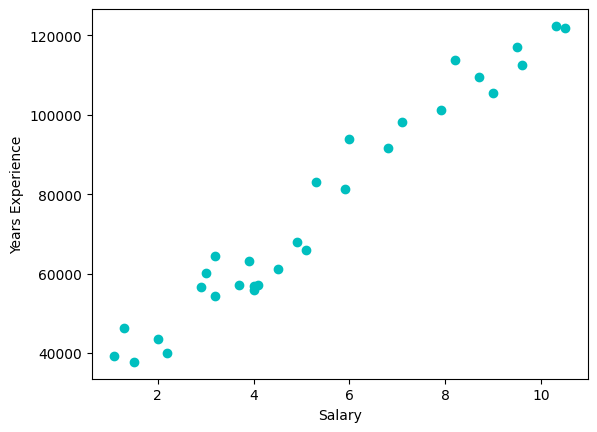

In [7]:
#x = salary.loc[:,"YearsExperience"].values # All the rows, Column labeled YearsExperience.
#y = salary.loc[:,"Salary"].values # All the rows, Column labeled Salary.

# iloc() Purely integer-location based indexing for selection by position.
x = salary.iloc[:,:1].values # All the rows, Only 1st Column. Select YearsExperience Column
y = salary.iloc[:,-1].values # All rows, Last Column. Select Salary Column

plt.scatter(x,y,color = 'c') # b is blue colour
plt.xlabel("Salary") # Independent Variable
plt.ylabel("Years Experience") # Dependent Variable
plt.show()


There is a Linear Relationship between YearsExperience and Salary

Fitting a Linear Regression Model.
.fit() prepares the data for prediction.

In [8]:
salary_model = LinearRegression()
salary_model.fit(x,y) # iloc.() is recommended!

LinearRegression()

We want to make a prediction of the Y value based on whatever value X value we feed.
The prediction values will be our ‘line of best fit’.

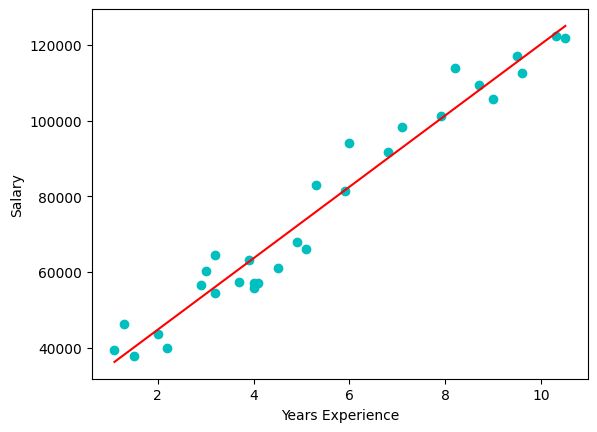

In [9]:
y_pred = salary_model.predict(x)

plt.scatter(x,y,color = 'c')
plt.plot(x,y_pred,color = 'r') # Plots line of best fit.
plt.xlabel("Years Experience") # Independent Variable
plt.ylabel("Salary") # Dependent Variable
plt.show()

If we are happy with this model, we may want to use it to determine how much to pay an employee who
has been at the company longer than any previous employee has.

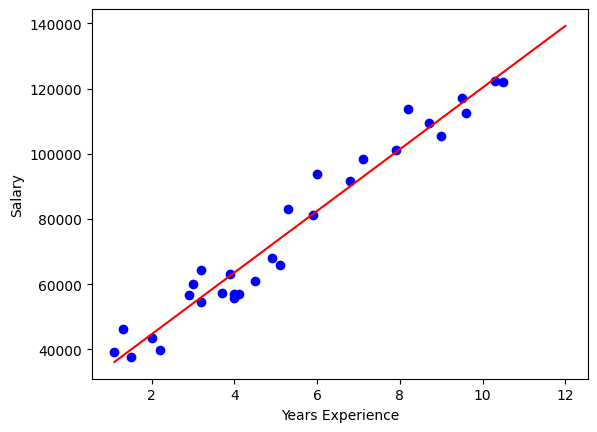

Employee should make: [139192.]


In [209]:
unk_x = [[12]] # The value added to dataset

# Reshape takes an array and reshapes it to the shape we specify.
# Simple Regression only takes in 1D arrays. 
# .append() turns data to 2D.
# .reshape(1,-1) turns the data into 1D. 
# np.append(x,unk_x) - We merge x and unk_x.
x_pred = np.append(x, unk_x).reshape(-1,1)  #.reshape() is from numpy.
y_pred = salary_model.predict(x_pred) # Feed in X prediction and get Y prediction. .predict() is from sklearn.

plt.scatter(x,y,color = 'b')
plt.plot(x_pred, y_pred, color = 'r')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

print("Employee should make:", salary_model.predict(unk_x).round(0))

#print("Employee should make:", salary_model.predict([[7]])) # Input value as a 2D array.

In [213]:
unk_x = [[12]]

x_pred = np.append(x, unk_x) # 2D
x_pred.reshape(-1,1) #1D

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [12. ]])

In [182]:
file_path ="C:/Users/tailb/Downloads/Mall_Customers.csv" # file_path is essential!
mall_customers = pd.read_csv(file_path) # if index_col is 0, in this case it means that "1" will be the index of the first column, "2" will be the index for the second column and so on.
#mall_customers.info()
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


If values are integers, .loc() is recommended.

If values were floats, .iloc() is recommended.

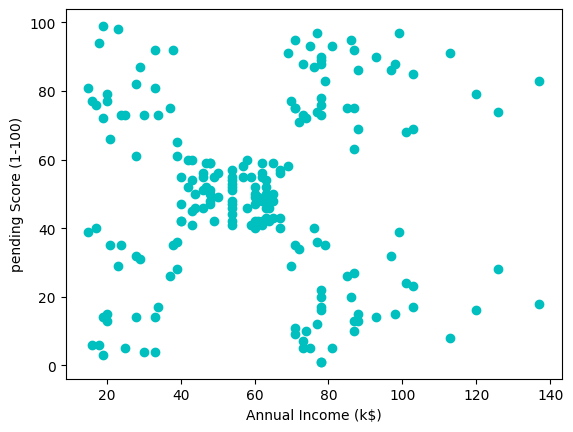

In [170]:
x = mall_customers.loc[:,"Annual Income (k$)"].values # All the rows, Column labeled Annual Income (k$).
y = mall_customers.loc[:,"Spending Score (1-100)"].values # All the rows, Column labeled Spending Score (1-100).

plt.scatter(x,y,color='c')
plt.xlabel("Annual Income (k$)")
plt.ylabel("pending Score (1-100)")
plt.show()

Linear Regression is not the best model to use. 
There is no linear relationship. 
Great for Clustering or Classification.